# Import and Install Dependencies

In [2]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib imutils re

In [10]:
import cv2
import imutils
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# Extract Keypoints using MP Holistic

In [11]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [12]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [13]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [14]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [17]:
cap = cv2.VideoCapture('Violence/V_10.mp4')
cap.set(3, 640)
cap.set(4, 480)
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        if ret == True:
                
            # Make detections
            image, results = mediapipe_detection(frame, holistic)
            print(results)

            # Draw landmarks
            draw_styled_landmarks(image, results)
 
            # Display the resulting frame
            cv2.imshow('Frame',frame)

            # Press Q on keyboard to  exit
            if cv2.waitKey(25) & 0xFF == ord('q'):
              break

          # Break the loop
        else: 
            break

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

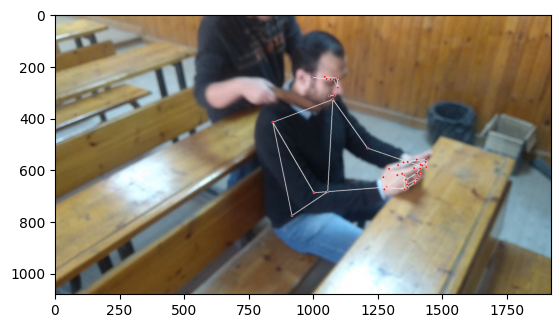

In [18]:
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Get Keypoint Values

In [19]:
len(results.pose_landmarks.landmark)

33

In [20]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [21]:
result_test = extract_keypoints(results)

In [22]:
result_test

array([ 0.56906122,  0.26349077, -0.43330142, ...,  0.73044157,
        0.58248359,  0.00260625])

In [23]:
np.save('0', result_test)

In [24]:
np.load('0.npy')

array([ 0.56906122,  0.26349077, -0.43330142, ...,  0.73044157,
        0.58248359,  0.00260625])

# Data Collection

In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['Violent', 'Non-Violent'])

# 1000 videos worth of data
no_sequences = 1000

# Videos are going to be 30 frames in length
sequence_length = 50

# Folder start
start_folder = 0

In [26]:
for action in actions:
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            print(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            print("Directory already created.")
            pass

directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory a

directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory already made
directory a

# Training and Testing //Error

In [20]:
# TEST

dir_paths = ['Violence', 'NonViolence']
for dir_path in dir_paths:
    for root, dirs, files in os.walk(dir_path):
        # Print the file names
        max_vid = 2
        count = 0
        for file in files:
            if count < max_vid:
                print(os.path.join(root, file))
                
                # VIDEO PLAYBACK WITH MP
                cap = cv2.VideoCapture(os.path.join(root, file))

                if (cap.isOpened()== False): 
                  print("Error opening video stream or file")
                
                with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
                    frame_num = 0
                    while cap.isOpened():

                        # Read feed
                        ret, frame = cap.read()

                        if ret == True:

                            # Make detections
                            image, results = mediapipe_detection(frame, holistic)
                            print(frame_num)
                            frame_num += 1

                            # Draw landmarks
                            draw_styled_landmarks(image, results)

                            # Display the resulting frame
                            cv2.imshow('Frame',frame)

                            # Press Q on keyboard to  exit
                            if cv2.waitKey(25) & 0xFF == ord('q'):
                              break

                          # Break the loop
                        else: 
                            break

                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                        
                        # Extract save file path
                        action = 'Violent'
                        number = '0'

                        if os.path.join(root, file)[0] == 'N':
                            action = 'Non-Violent'
                
                            match = re.search(r'NV_(?P<number>\d+)', file_name)
                            number = match.group('number')
                        
                        else:
                            match = re.search(r'V_(?P<number>\d+)', file_name)
                            number = match.group('number')
                            
                        
                                                # Extract data
                        keypoints = extract_keypoints(results)
                        npy_path = os.path.join(DATA_PATH, action, str(number), str(frame_num))
                        np.save(npy_path, keypoints)
                            

                        # Break gracefully
                        if cv2.waitKey(10) & 0xFF == ord('q'):
                            break
                    cap.release()
                    cv2.destroyAllWindows()


                
                count += 1
            else:
                print("\n")
                break

Violence\V_1.mp4
0


NameError: name 're' is not defined